# 03: Evaluation matrics

## Basic classification matrics

### p32 Accuracy

In [1]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred): # zip()
        if yt == yp:
            # if prediction is equal to truth, increas the counter
            correct_counter += 1
    # return accuracy
    # which is correcct prediction over the number of samples
    return correct_counter / len(y_true)

In [2]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
accuracy(l1, l2)

0.625

In [3]:
from sklearn import metrics
metrics.accuracy_score(l1,l2)

0.625

In [4]:
# another useful function in sciit-learn (added by AI)
from sklearn.metrics import classification_report
report = classification_report(l1, l2, target_names=['False','True'], digits=3)
print(report)

              precision    recall  f1-score   support

       False      0.600     0.750     0.667         4
        True      0.667     0.500     0.571         4

    accuracy                          0.625         8
   macro avg      0.633     0.625     0.619         8
weighted avg      0.633     0.625     0.619         8



### p34 TP / TN / FP / FN

### Confusion Matrix (see p58)  
<!--
![Confusion Matrix](Confusion_matrix_s.png)
-->
<img src="Confusion_matrix.png" width="350" align="left">

In [5]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positive
    :param y_true: list of true values
    :param y_pred: list of predicted values
    rerurn: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp ==1:
            tp += 1
    return tp

In [6]:
def true_negative(y_true, y_pred):
    """
    Function to calculate True Positive
    :param y_true: list of true values
    :param y_pred: list of predicted values
    rerurn: number of true pnegatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp ==0:
            tn += 1
    return tn

In [7]:
def false_positive(y_true, y_pred):
    """
    Function to calculate True Positive
    :param y_true: list of true values
    :param y_pred: list of predicted values
    rerurn: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp ==1:
            fp += 1
    return fp

In [8]:
def false_negative(y_true, y_pred):
    """
    Function to calculate True Positive
    :param y_true: list of true values
    :param y_pred: list of predicted values
    rerurn: number of false positives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp ==0:
            fn += 1
    return fn

In [9]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [10]:
true_positive(l1, l2)

2

In [11]:
false_positive(l1, l2)

1

In [12]:
false_negative(l1, l2)

2

In [13]:
true_negative(l1, l2)

3

### p36 Accuracy (v2)

In [14]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    rerurn: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [15]:
accuracy(l1, l2)

0.625

In [16]:
accuracy_v2(l1, l2)

0.625

In [17]:
metrics.accuracy_score(l1, l2)

0.625

### p37 Precision

In [18]:
def precision(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    rerurn: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision_score = tp / (tp + fp)
    return precision_score

In [19]:
precision(l1, l2)

0.6666666666666666

In [20]:
def recall(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    rerurn: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall_score = tp / (tp + fn)
    return recall_score

In [21]:
recall(l1, l2)

0.5

### p39 Precision-Recall Curve

In [22]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [23]:
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

In [24]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]
# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

Text(0, 0.5, 'Precision')

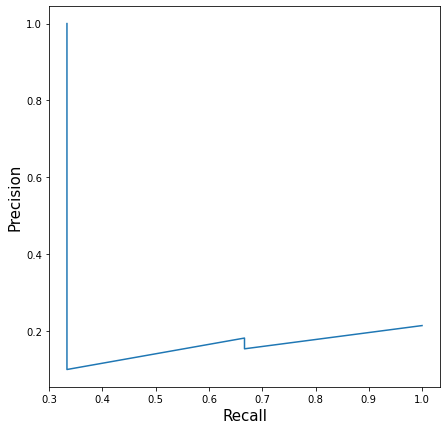

In [26]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

### p41 F1

In [27]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

In [28]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred)

0.5714285714285715